In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data_path = '../files/data/'

In [29]:
solve_vs_brute_force = pd.read_csv(data_path + 'solve_vs_brute_force.csv', header=None)
solve_vs_solve_parallel = pd.read_csv(data_path + 'solve_vs_solve_parallel.csv', header=None)

solve_vs_brute_force.columns = ['instance_size', 'solver_t', 'time_in_ns']
solve_vs_solve_parallel.columns = ['instance_size', 'solver_t', 'time_in_ns']

solve_vs_brute_force['solver_t'] = solve_vs_brute_force['solver_t'].str.strip()
solve_vs_solve_parallel['solver_t'] = solve_vs_solve_parallel['solver_t'].str.strip()

# Solve vs Brute Force

In [30]:
solve_vs_brute_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   instance_size  280 non-null    int64 
 1   solver_t       280 non-null    object
 2   time_in_ns     280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


In [31]:
solve_vs_brute_force.head()

,instance_size,solver_t,time_in_ns
0,3,branch_bound,54292
1,3,brute_force,15166
2,3,branch_bound,57625
3,3,brute_force,14750
4,3,branch_bound,48916


In [32]:
solve_vs_brute_grouped = solve_vs_brute_force.groupby(['instance_size', 'solver_t'])['time_in_ns'].mean()
solve_vs_brute_grouped = solve_vs_brute_grouped.reset_index()
bb_data = solve_vs_brute_grouped[solve_vs_brute_grouped['solver_t'] == 'branch_bound']
bf_data = solve_vs_brute_grouped[solve_vs_brute_grouped['solver_t'] == 'brute_force']

bb_data

,instance_size,solver_t,time_in_ns
0,3,branch_bound,53385.35
2,4,branch_bound,142891.55
4,5,branch_bound,393400.00
6,6,branch_bound,1045722.90
8,7,branch_bound,2807106.20
10,8,branch_bound,8301727.00
12,9,branch_bound,20672929.10


In [33]:
bf_data

,instance_size,solver_t,time_in_ns
1,3,brute_force,1.458550e+04
3,4,brute_force,4.983745e+04
5,5,brute_force,2.192563e+05
7,6,brute_force,1.149087e+06
9,7,brute_force,7.948296e+06
11,8,brute_force,6.302365e+07
13,9,brute_force,6.145159e+08


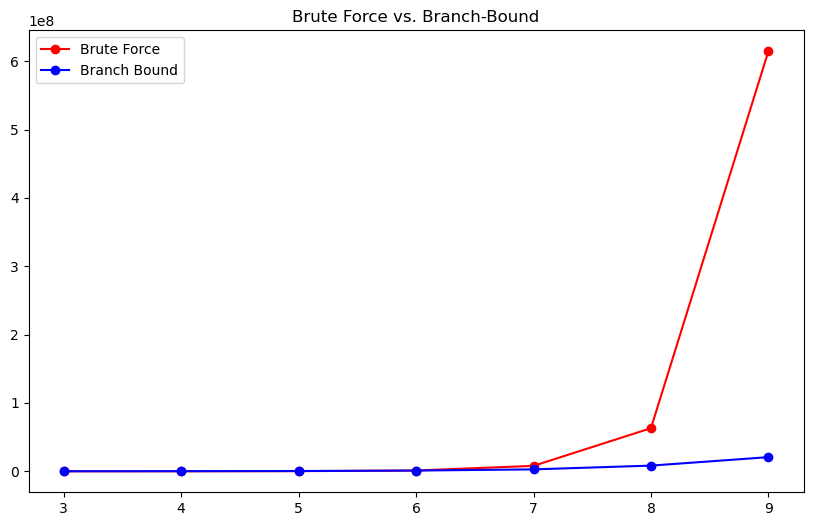

In [34]:
plt.figure(figsize=(10, 6))
plt.title("Brute Force vs. Branch-Bound")
plt.plot(bf_data['instance_size'], bf_data['time_in_ns'], label='Brute Force', marker='o', color='r')
plt.plot(bb_data['instance_size'], bb_data['time_in_ns'], label='Branch Bound', marker='o', color='b')
plt.legend()
plt.show()

# Solve vs Solve Parallel

In [35]:
solve_vs_solve_parallel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   instance_size  720 non-null    int64 
 1   solver_t       720 non-null    object
 2   time_in_ns     720 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.0+ KB


In [36]:
solve_vs_solve_parallel.head()

,instance_size,solver_t,time_in_ns
0,3,branch_bound,54292
1,3,brute_force,15166
2,3,branch_bound,57625
3,3,brute_force,14750
4,3,branch_bound,48916


In [37]:
solve_vs_solve_parallel = solve_vs_solve_parallel.groupby(['instance_size', 'solver_t'])['time_in_ns'].mean()
solve_vs_solve_parallel = solve_vs_solve_parallel.reset_index()
bbs_data = solve_vs_solve_parallel[solve_vs_solve_parallel['solver_t'] == 'bb']
bbp_data = solve_vs_solve_parallel[solve_vs_solve_parallel['solver_t'] == 'bb_parallel']

bbs_data

,instance_size,solver_t,time_in_ns
0,3,bb,4.811660e+04
4,4,bb,1.121771e+05
8,5,bb,3.040853e+05
12,6,bb,8.228791e+05
16,7,bb,2.276908e+06
20,8,bb,6.101529e+06
24,9,bb,3.229161e+07
28,10,bb,8.320064e+07
30,11,bb,2.058529e+08
32,12,bb,4.027979e+08


In [38]:
bbp_data

,instance_size,solver_t,time_in_ns
1,3,bb_parallel,2.339794e+05
5,4,bb_parallel,2.709562e+05
9,5,bb_parallel,3.756541e+05
13,6,bb_parallel,5.402563e+05
17,7,bb_parallel,9.343395e+05
21,8,bb_parallel,1.980017e+06
25,9,bb_parallel,6.916742e+06
29,10,bb_parallel,1.669502e+07
31,11,bb_parallel,3.165919e+07
33,12,bb_parallel,8.161370e+07


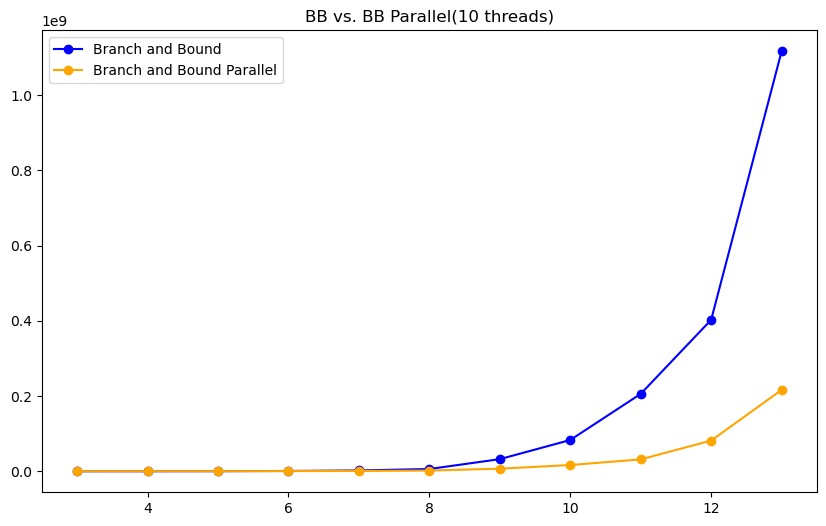

In [39]:
plt.figure(figsize=(10, 6))
plt.title("BB vs. BB Parallel(10 threads)")
plt.plot(bbs_data['instance_size'], bbs_data['time_in_ns'], label='Branch and Bound', marker='o', color='blue')
plt.plot(bbp_data['instance_size'], bbp_data['time_in_ns'], label='Branch and Bound Parallel', marker='o', color='orange')
plt.legend()
plt.show()